## **1. Supervised Learning**

In Supervised Learning the predicted values are known. The aim is to predict the target values of unseen data, given the features.

**Types of supervised Learning:**

- Classification: Target variable consists of categories
- Regression: Target variable is continous.

**Feature** = predictor variable = independent variable 

**Target variable** = dependent variable = response variable


**Requirements** before using Supervised Learning
- No missing values
- Data in numeric format
- Data stored in pandas DataFrames or NumPy Arrays.

Perform Exploratory Data Analysis (EDA) first.


**Scikit-Learn Syntax:**
- from sklearn.module import Model
- model = Model()
- model.fit(X,y)
- predictions = model.predict(X_new)
- print(predictions)


#### **Classification Problem**

Let $\mathcal{X}$ be the feature space, and $\mathcal{Y}$ be the label space. We are given a dataset $D = {(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \ldots, (\mathbf{x}_n, y_n)}$, where $\mathbf{x}_i \in \mathcal{X}$ represents a feature vector and $y_i \in \mathcal{Y}$ represents the corresponding class label.

The goal of a classification problem is to learn a function $f: \mathcal{X} \rightarrow \mathcal{Y}$ that maps an input feature vector $\mathbf{x} \in \mathcal{X}$ to its corresponding class label $y \in \mathcal{Y}$. The function $f$ represents the classifier.


#### **Regression Problem:**
Let $\mathcal{X}$ be the feature space, and $\mathcal{Y}$ be the target space. We are given a dataset $D = {(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \ldots, (\mathbf{x}_n, y_n)}$, where $\mathbf{x}_i \in \mathcal{X}$ represents a feature vector and $y_i \in \mathcal{Y}$ represents the corresponding target value.

The goal of a regression problem is to learn a function $f: \mathcal{X} \rightarrow \mathcal{Y}$ that maps an input feature vector $\mathbf{x} \in \mathcal{X}$ to its corresponding target value $y \in \mathcal{Y}$. The function $f$ represents the regression model.


**In both cases**, the learning process involves finding the optimal parameters or coefficients for the function $f$, typically denoted as $\theta$ (or $\beta$), by minimizing a suitable loss or error function. The choice of the loss function depends on the specific algorithm and problem at hand.

### **1.1. Classification**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

churn_df = pd.read_csv('../datasets/telecom_churn_clean.csv', index_col=0)
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


#### **The k-Nearest Neighbors (kNN) Algorithm**

The k-Nearest Neighbors (k-NN) algorithm is a non-parametric classification and regression method. 

The goal of the KNN algorithm is to predict the label of a new input vector $x$ by finding the $k$ nearest neighbors in the training set and assigning the label based on a majority vote.

Let $d(x, x_i)$ be a distance metric that measures the distance between the new input vector $x$ and a training vector $x_i$. The most commonly used distance metric is the Euclidean distance:

$d(x, x_i) = \sqrt{\sum_{j=1}^{m}(x_{ij} - x_{ij})^2}$

where $m$ is the number of features in each vector.

To predict the label of $x$, the KNN algorithm follows these steps:

1. Compute the distance $d(x, x_i)$ between the new input vector $x$ and each training vector $x_i$.
2. Select the $k$ training vectors with the smallest distances.
3. Count the number of occurrences of each label among the selected $k$ training vectors.
4. Assign the label with the highest count as the predicted label for $x$.

The KNN algorithm is a non-parametric and lazy learning algorithm, meaning it does not make any assumptions about the underlying data distribution and postpones the generalization process until a new input is encountered.



#### **kNN from Scratch:**

In [26]:
import numpy as np

class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X):
        y_pred = []
        
        for x in X:
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in indices]
            label_counts = np.bincount([self.label_to_int[label] for label in k_nearest_labels])
            most_common = np.argmax(label_counts)
            y_pred.append(self.int_to_label[most_common])
        
        return np.array(y_pred)


#### **Example:**

In [27]:
# Define the data points and their corresponding classes
X_train = np.array([[2, 3], [4, 2], [1, 3], [3, 6], [7, 2]])
y_train = np.array(['Class A', 'Class A', 'Class B', 'Class B', 'Class A'])

k = 3  # Specify the number of nearest neighbors to consider
knn = KNN(k)
knn.fit(X_train, y_train)

X_new = np.array([[5, 4]])

# Map class labels to integers
labels = np.unique(y_train)
knn.label_to_int = {label: i for i, label in enumerate(labels)}
knn.int_to_label = {i: label for i, label in enumerate(labels)}

y_pred = knn.predict(X_new)
print("Predicted class:", y_pred)

Predicted class: ['Class A']


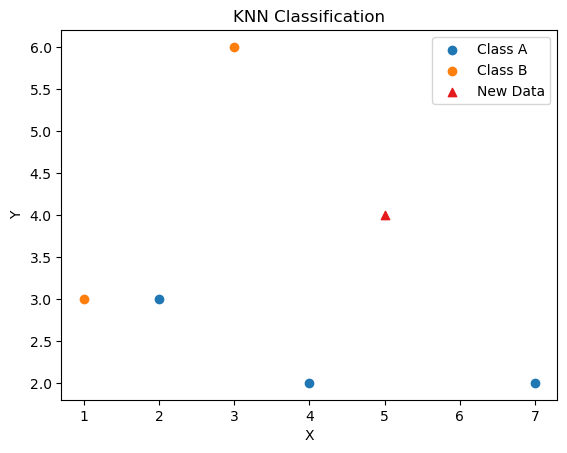

In [28]:
# Convert class labels to numeric values
y_train_numeric = np.array([knn.label_to_int[label] for label in y_train])
y_pred_numeric = np.array([knn.label_to_int[label] for label in y_pred])

# Plotting the data points and predicted class
plt.figure()

# Plotting the training data points
for label in labels:
    indices = np.where(y_train == label)
    plt.scatter(X_train[indices, 0], X_train[indices, 1], label=label)

# Plotting the new data point
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_pred_numeric, cmap='Set1', marker='^', label='New Data')

plt.title('KNN Classification')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### **kNN with scikit-learn:**

In [29]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 


# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=2)

# Fit the classifier to the data
knn.fit(X, y)

X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


#### **Measuring model performance**

In classification, accuracy is a commonly used metric.

\begin{align*}
Accuracy = \frac{\text{correct predictions}}{\text{total observations}}
\end{align*}

But it is NOT indicative of how well it can generalize to unseen data, which is what we are interested in!

Therefore we **split the data into training set and test set**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8740629685157422


#### **Model complexity and Over/Underfitting**

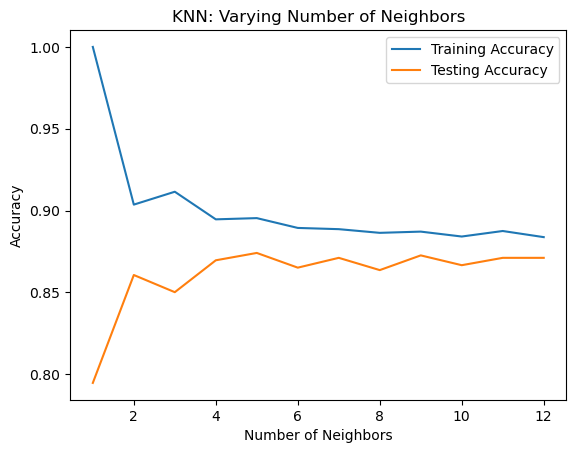

In [32]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)


# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

### **1.2. Regression**

In [33]:
diabetes_df = pd.read_csv('../datasets/diabetes_clean.csv')
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### **Ordinary Least Squares Approach:**

\begin{align*}
y = \beta_0 + \beta_1 x + \epsilon
\end{align*}

Simple Linear Regression uses one feature
- $y$ = target
- $x$ = single feature
- $\beta_0$ and $\beta_1$ are the coefficients (slope and intercept)
- $\epsilon$ = error


**How we choose $\beta_0$ and $\beta_1$?**

**Choose the line that minimize the error function/loss function**

- We want the line to be as close to observations as possible - **best fit**.
- Therefore we want to minimize the vertical distances between the fit and the data.
- So for each observation, we caluclate the vertical distance betweet it and the line. This distance is called **residual**.
- By adding all the squared residuals, we calculate the the residual sum of squares:

\begin{align*}
RSS &= \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \\
    &= (y_1 - (\hat{\beta}_0 + \hat{\beta}_1 x_1))^2 + (y_2 - (\hat{\beta}_0 + \hat{\beta}_1 x_2))^2  + \dots + (y_n - (\hat{\beta}_0 + \hat{\beta}_1 x_n))^2

\end{align*}

This type of linar regression is called **Ordinary Least Squares**, where **we minimize the RSS**, so the parameters determined by:


\begin{align*}
\hat{\beta}_1 &= \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2} \\
\hat{\beta}_0 &= \bar{y} - \hat{\beta}_1 \bar{x}
\end{align*}

The multiple linear Regression takes the form:

\begin{align*}
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon
\end{align*}


The RSS for the multiple linear regression is given by:

\begin{align*}
RSS &= \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \\
    &= (y_i  - (\hat{\beta}_0 + \sum_{j=1}^p \hat{\beta}_j x_{ij})^2) \\
    &= (y-X\hat{\beta})^T (y-X\hat{\beta})
\end{align*}

The coefficients that minimizes above RSS are given by:

\begin{align*}
\hat{{\beta}} = (X^TX)^{-1} X^Ty.
\end{align*}

This is the closed-form solution for the parameters $\hat{\beta}$​ in the context of ordinary least squares (OLS) linear regression. This method provides the exact solution without the need for iterative optimization. This equation calculates the optimal values for the regression coefficients $\hat{\beta}$​ without the need for iterative optimization algorithms like **gradient descent**.

#### **Gradient descent**

The gradient descent approach in linear regression involves the following steps:

**1. Define the hypothesis function:**

To start, we define the hypothesis function, which represents the relationship between the independent variables $x$ and the dependent variable $y4. In linear regression, the hypothesis function is defined as:

\begin{align*}
h_{\theta}(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \ldots + \theta_nx_n
\end{align*}

Here, the $\theta$ parameters represent the coefficients that determine the influence of each independent variable on the dependent variable.

**2. Define the cost function:**

The cost function measures the error between the predicted values from our hypothesis function and the actual values in the training data. In linear regression, the mean squared error (MSE) is commonly used as the cost function. It is calculated as:

\begin{align*}
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2
\end{align*}

Here, $m$ represents the number of training examples, and the sum calculates the squared difference between the predicted value $h(\theta(x_i))$ and the actual value $y_i$ for each training example.

**3. Update the parameters using gradient descent:**

The objective of gradient descent is to find the optimal values for the $\theta$ parameters that minimize the cost function. This is achieved through an iterative process of updating the parameters based on the gradients of the cost function with respect to each parameter.

The update rule for each parameter $\theta_j$ is given by:

\begin{align*}
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
\end{align*}

Here, $\alpha$ represents the learning rate, which determines the step size of each parameter update. The partial derivative $\frac{\partial J(\theta)}{\partial \theta_j}$  calculates the rate of change of the cost function with respect to $\theta_j$ and is given by:

\begin{align*}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}
\end{align*}

This derivative represents the average of the product of the prediction error $h(\theta(x_i) - y_i)$  and the corresponding value of the $j$-th independent variable $x_j$ for each training example.

**4. Repeat the parameter updates until convergence:**

The parameter updates are performed iteratively until convergence or until a maximum number of iterations is reached. Convergence is typically determined by monitoring the change in the cost function or the parameters themselves. When the updates no longer result in significant changes in the cost function or the parameters, we can consider the algorithm to have converged.

By updating the parameters in the opposite direction of the gradients, gradient descent gradually minimizes the cost function. This iterative process allows the algorithm to find the optimal values for the $\theta$ parameters that best fit the training data, ultimately enabling accurate predictions in linear regression.

In [34]:
# Generate some sample data
X = np.array([1, 2, 3, 4, 5])  # Independent variable
y = np.array([3, 6, 9, 12, 15])  # Dependent variable

# Initialize the parameters
theta0 = 0  # Intercept
theta1 = 0  # Slope

# Set the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
for iteration in range(num_iterations):
    # Make predictions
    predictions = theta0 + theta1 * X

    # Calculate the gradients
    gradient0 = (1/len(X)) * np.sum(predictions - y)
    gradient1 = (1/len(X)) * np.sum((predictions - y) * X)

    # Update the parameters
    theta0 -= learning_rate * gradient0
    theta1 -= learning_rate * gradient1

# Print the final parameters
print("Optimal parameters:")
print("Theta0:", theta0)
print("Theta1:", theta1)


Optimal parameters:
Theta0: 0.1421298230062645
Theta1: 2.9606323180863057


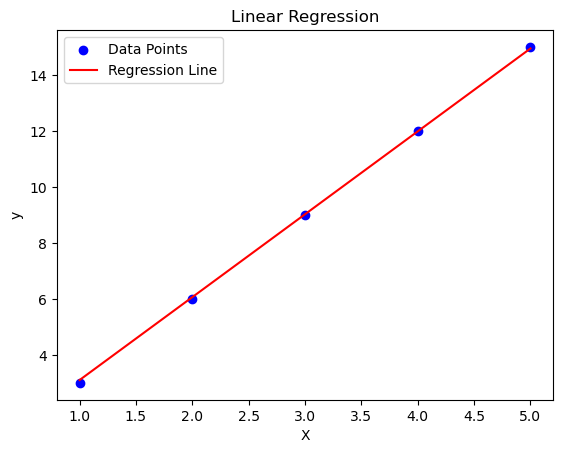

In [35]:
# Generate the regression line
regression_line = theta0 + theta1 * X

# Plot the data points and regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, regression_line, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

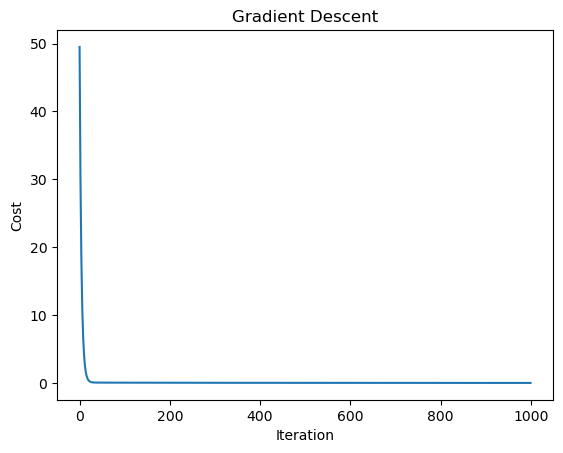

In [36]:
# Initialize the parameters
theta0 = 0  # Intercept
theta1 = 0  # Slope

# Set the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
cost_history = []

for iteration in range(num_iterations):
    # Make predictions
    predictions = theta0 + theta1 * X

    # Calculate the gradients
    gradient0 = (1/len(X)) * np.sum(predictions - y)
    gradient1 = (1/len(X)) * np.sum((predictions - y) * X)

    # Update the parameters
    theta0 -= learning_rate * gradient0
    theta1 -= learning_rate * gradient1

    # Calculate the cost
    cost = (1/(2*len(X))) * np.sum((predictions - y)**2)
    cost_history.append(cost)

# Plot the cost function
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

#### **Linear Regression with scikit-learn**

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### **Simple Linear Regression**

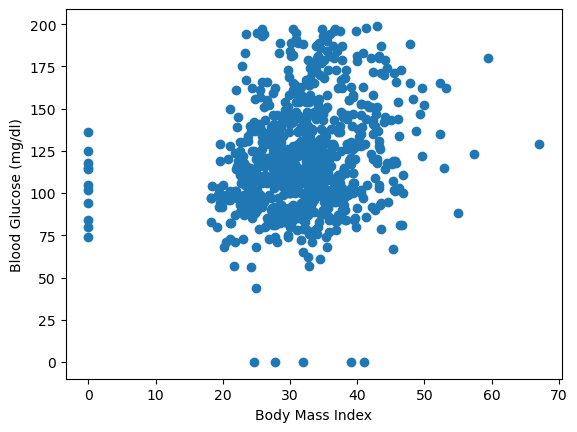

In [38]:
X_bmi = diabetes_df['bmi'].values
y = diabetes_df['glucose']

plt.scatter(X_bmi,y)
plt.xlabel('Body Mass Index')
plt.ylabel('Blood Glucose (mg/dl)')
plt.show()

In [39]:
X_bmi = X_bmi.reshape(-1,1)

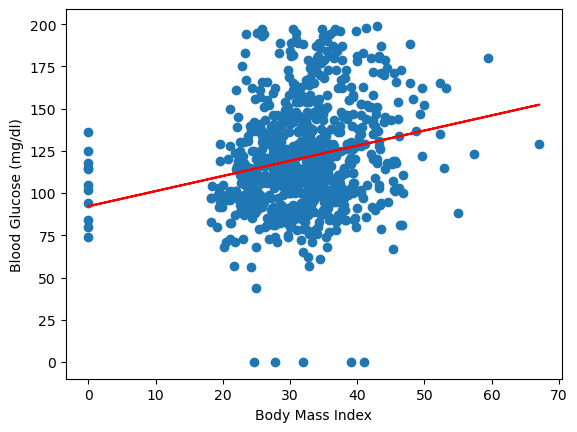

In [40]:
reg = LinearRegression()
reg.fit(X_bmi,y)

predictions = reg.predict(X_bmi)

plt.scatter(X_bmi,y)
plt.plot(X_bmi, predictions, color = 'red')
plt.xlabel('Body Mass Index')
plt.ylabel('Blood Glucose (mg/dl)')
plt.show()

#### **Multiple Linear Regression**

In [41]:
X = diabetes_df.drop('glucose',axis=1).values
y = diabetes_df['glucose'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train,y_train)

y_pred = reg_all.predict(X_test)

#### **Metrics for Linear Regression**

The **default metric** for linear Regression is **$R^2$** (Coefficient of determination), which quantifies the amount of variance in the target variable that is explained by the features. The values for $R^2$ can range from $0$ to $1$, where $1$ meaning the features completely explain the target's variance.

Another way to asses a regression model's performance is to take the **mean of the residual sum of squares (MSE)**.

\begin{align*}
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{align*}

MSE is measured in units of our target variable, squared. So we need to take the squared root **Root Mean Squared Error**, so we have the same units as the target variable:
$RMSE = \sqrt{MSE}$.

In [42]:
print(reg_all.score(X_test,y_test))

0.2828046881037515


Here the features only explain about 28% of blood glucose level variance.

In [43]:
RMSE = mean_squared_error(y_test,y_pred, squared=False)
print(RMSE)

26.34145958223226


The model has an average error for blood glucose levels of around 24 milligrams per deciliter.

#### **Cross-validation**

- Our model-performance is dependent on the way that we split up the data.
- Not representative of the model's ability to generalize to unseen data.
- **Solution: Cross-validation!**


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/2880px-K-fold_cross_validation_EN.svg.png" width="700" />


In [44]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg,X,y, cv = kf)

**Analyzing cross-validation metrics:**

In [45]:
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

0.3190969786734479
0.07015320610114217
[0.24088592 0.41580685]


#### **Regularized Regression**

- Regularization in Regression is a technique used to **avoid overfitting**. 

- Regularization: Penalize large coefficients

#### **(i) Ridge Regression**

\begin{align*}
RSS_{ridge} = RSS + \alpha \sum_{j=1}^p \beta_j^2
\end{align*}


**Ridge regression is also referred to as L2 Regularization.**

- Ridge penalizes large coefficients or negative coefficients
- The parameter $\alpha$ is known as **hyperparameter** - a variable used to optimize model parameters
- $\alpha$ controls the model complexity

Calculate the $R^2$ score for each iteration of ridge:

In [46]:
from sklearn.linear_model import Ridge

scores = []
for alpha in [0.1, 1.0, 10, 100, 1000]:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test,y_test))
print(scores)

[0.2828466623222221, 0.28320633574804766, 0.2853000732200006, 0.26423984812668133, 0.1929242469410093]


#### **(ii) Lasso Regression**

Here we the RSS function plus the absolute value:


\begin{align*}
RSS_{lasso} = RSS + \alpha \sum_{j=1}^p |\beta_j|
\end{align*}

**Lasso regression is also referred to as L1 Regularization.**


In [47]:
from sklearn.linear_model import Lasso

scores = []
for alpha in [0.1, 1.0, 10, 20, 50]:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test,y_test))
print(scores)

[0.28575325694826237, 0.29795609755827845, 0.17989838789273893, 0.18127361610181125, 0.15679544303617965]


#### **Lasso Regression can also used for feature selection:**

L1 Norm (Lasso regularization):
- The L1 norm of a vector is the sum of the absolute values of its elements. In the context of regularization, the L1 norm penalty is added to the objective function of a linear regression model. When the L1 norm is minimized, some of the coefficients will be reduced to zero, effectively performing feature selection. This sparsity-inducing property of the L1 norm allows Lasso to select a subset of features while shrinking the coefficients of less important features towards zero.

L2 Norm (Ridge regularization):
- The L2 norm of a vector is the square root of the sum of the squared values of its elements. In ridge regularization, the L2 norm penalty is added to the objective function. Unlike L1 norm, the L2 norm does not drive coefficients exactly to zero. Instead, it shrinks their values towards zero, but they rarely become zero. Ridge regularization helps to reduce the impact of less important features without eliminating them completely.

**In summary, Lasso uses the L1 norm penalty to encourage sparsity, making it suitable for feature selection.**

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*Jd03Hyt2bpEv1r7UijLlpg.png" width="700" />

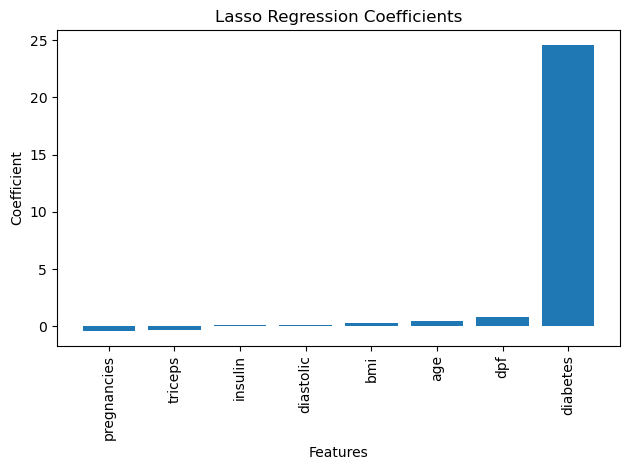

In [48]:
# Fit Lasso regression
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y)

# Get coefficient values and corresponding feature names
coefficients = lasso_coef.coef_
feature_names = diabetes_df.drop("glucose", axis=1).columns

# Create a DataFrame with coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient values
coefficients_df = coefficients_df.sort_values('Coefficient')

plt.bar(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Lasso Regression Coefficients')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **1.3. Fine-Tuning your Model**

### **1.4. Preprocessing and Pipelines**